#### <h1 align="center">INFOSYS SPRINGBOARD INTERNSHIP</h1>
<h1 align="center">MileStone 4</h1>
<H3 align="right">Name: Rudrani Ghosh</H3>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/Users/rudranighosh/Downloads/Healthcare Providers.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [51]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [52]:
irrelevant_columns=['Entity Type of the Provider',
                    'Street Address 1 of the Provider',
                    'Street Address 2 of the Provider',
                    'Zip Code of the Provider',
                    'Medicare Participation Indicator',
                    'Place of Service',
                    'HCPCS Code',
                    'HCPCS Description',
                    'HCPCS Drug Indicator',
                    'Country Code of the Provider']

data=data.drop(columns=irrelevant_columns)


Columns that have no relevance in our assignment have been dropped

In [53]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


<h2>Data Preprocessing </h2>

In [54]:
# Merging the name columns into a single column 
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                    data['Last Name/Organization Name of the Provider'].fillna('')
data['Full Name'] = data['Full Name'].str.strip()

data = data.drop(columns=['Last Name/Organization Name of the Provider', 
                          'First Name of the Provider', 
                          'Middle Initial of the Provider'])

full_name_column = data.pop('Full Name')

data.insert(1, 'Full Name', full_name_column)


data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


A new column "Full Name" has been created to merge first name, middle name and last name

In [55]:
# Uniform format of credentials
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


"Credentials of the Provider" column now follows a uniform format. Such that MD and M.D and M.D. are all treated as the same unit

<h2>Converting Object to Numeric Type </h2>

In [56]:
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               92791 non-null   object 
 4   Gender of the Provider                                    95746 non-null   object 
 5   City of the Provider                                      100000 non-null  object 
 6   State Code of the Provider                                100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Numbe

<h2>Looking for Missing Values and imputing them with Mean </h2>

In [57]:
# missing values
print(data.isnull().sum())


index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                          2653
Number of Medicare Beneficiaries                             405
Number of Distinct Medicare Beneficiary/Per Day Services    1500
Average Medicare Allowed Amount                              745
Average Submitted Charge Amount                             6723
Average Medicare Payment Amount                              466
Average Medicare Standardized Amount                         470
dtype: int64


In [58]:
# Imputation of numeric missing values with mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge Amount                                0
Average Medicare Payment Amount                                0
Average Medicare Standardized Amount                           0
dtype: int64


<h2>Imputation of categorical columns with mode</h2>

In [59]:
categorical_columns = ['Credentials of the Provider',
                   'Gender of the Provider',
                   'City of the Provider',
                  'State Code of the Provider']

for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print(data.isnull().sum())


index                                                       0
Full Name                                                   0
National Provider Identifier                                0
Credentials of the Provider                                 0
Gender of the Provider                                      0
City of the Provider                                        0
State Code of the Provider                                  0
Provider Type                                               0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64


<h2>Looking for Duplicate Values </h2>

In [60]:
# Check for duplicates
print(data.duplicated().sum())


0


In [61]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


<h2>Encoding some Categorical Columns using Frequency Encoder</h2>

In [62]:
def frequency_encode(df, columns):
    for column in columns:
        freq_encoding = df[column].value_counts() / len(df)
        new_column_name = column + '_Freq'
        df.insert(df.columns.get_loc(column) + 1, new_column_name, df[column].map(freq_encoding))
    return df

columns_to_encode=['Credentials of the Provider',
                   'Gender of the Provider',
                   'Provider Type',
                  'State Code of the Provider']

data = frequency_encode(data, columns_to_encode)

df=data

data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.73827,F,0.29105,SAINT LOUIS,MO,0.01997,Internal Medicine,0.11366,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,0.73827,F,0.29105,FAYETTEVILLE,NC,0.03725,Obstetrics & Gynecology,0.01028,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,0.01915,M,0.70895,NORTH HAVEN,CT,0.01403,Podiatry,0.02027,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,0.73827,M,0.70895,KANSAS CITY,MO,0.01997,Internal Medicine,0.11366,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,0.06176,M,0.70895,JUPITER,FL,0.07263,Internal Medicine,0.11366,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [63]:
df.columns

Index(['index', 'Full Name', 'National Provider Identifier',
       'Credentials of the Provider', 'Credentials of the Provider_Freq',
       'Gender of the Provider', 'Gender of the Provider_Freq',
       'City of the Provider', 'State Code of the Provider',
       'State Code of the Provider_Freq', 'Provider Type',
       'Provider Type_Freq', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')

<h2>Performing Standardization on Numerical Columns</h2>

In [64]:
from sklearn.preprocessing import StandardScaler

data_copy=data.copy()

standardization_columns=['Number of Services',
                         'Number of Medicare Beneficiaries',
                         'Number of Distinct Medicare Beneficiary/Per Day Services',
                         'Average Medicare Allowed Amount',
                         'Average Submitted Charge Amount',
                         'Average Medicare Payment Amount',
                         'Average Medicare Standardized Amount',
                         'Credentials of the Provider_Freq',
                         'Gender of the Provider_Freq',
                         'State Code of the Provider_Freq' ]

# Standardization
standard_scaler = StandardScaler()
data[standardization_columns] = standard_scaler.fit_transform(data[standardization_columns])



print("Standardized DataFrame:")
data.head()

Standardized DataFrame:


,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.594983,F,-1.560716,SAINT LOUIS,MO,-0.737342,Internal Medicine,0.11366,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321
1,3354385,WENDY P JONES,1346202256,MD,0.594983,F,-1.560716,FAYETTEVILLE,NC,-0.004973,Obstetrics & Gynecology,0.01028,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789
2,3001884,RICHARD W DUROCHER,1306820956,DPM,-1.684316,M,0.640731,NORTH HAVEN,CT,-0.989093,Podiatry,0.02027,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209
3,7594822,JASPER FULLARD,1770523540,MD,0.594983,M,0.640731,KANSAS CITY,MO,-0.737342,Internal Medicine,0.11366,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804
4,746159,ANTHONY E PERROTTI,1073627758,DO,-1.549260,M,0.640731,JUPITER,FL,1.494517,Internal Medicine,0.11366,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510


<H2>FINAL DATASET </H2>

In [65]:

anomaly_detection_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Credentials of the Provider_Freq',
    'Gender of the Provider_Freq',
    'State Code of the Provider_Freq', 
    'Provider Type_Freq'
]

X = data[anomaly_detection_columns]

X

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Credentials of the Provider_Freq,Gender of the Provider_Freq,State Code of the Provider_Freq,Provider Type_Freq
0,-0.497577,-0.444753,-0.482232,1.098226,0.621012,0.972452,1.003321,0.594983,-1.560716,-0.737342,0.11366
1,0.503328,1.040098,0.554599,0.352134,1.940981,0.549955,0.722789,0.594983,-1.560716,-0.004973,0.01028
2,-0.463762,-0.552921,-0.447204,0.031012,-0.192958,-0.047975,-0.096209,-1.684316,0.640731,-0.989093,0.02027
3,-0.544917,-0.503753,-0.531272,-0.814992,-1.005784,-0.718674,-0.722804,0.594983,0.640731,-0.737342,0.11366
4,-0.456999,-0.444753,-0.454210,-0.591527,-0.816125,-0.541578,-0.551510,-1.549260,0.640731,1.494517,0.11366
...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.544917,-0.484087,-0.531272,-0.020219,0.126753,-0.088807,-0.078095,-1.709831,-1.560716,0.142517,0.02780
99996,0.239576,0.371423,0.281380,-0.254193,-0.252286,-0.426514,-0.354403,-1.729577,-1.560716,-1.140399,0.05713
99997,-0.605783,-0.572588,-0.594322,-0.674428,-0.439269,-0.601485,-0.600151,0.594983,0.640731,-0.737342,0.04602
99998,-0.599020,-0.562754,-0.587316,-0.552503,-0.680654,-0.427351,-0.482868,0.594983,-1.560716,1.112228,0.11366


---

<br>

<H2>Using Auto Encoders</H2>

<H3>Autoencoders can be a powerful tool for anomaly detection</H3>

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Input, Dense

X_scaled = X  # since X is already standardized

# Define the Autoencoder Model
input_dim = X_scaled.shape[1]
encoding_dim = 11  # Number of nodes in the encoded layer
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Input, Dense

X_scaled = X  

# Defining the Autoencoder Model with 6 Dense Layers
input_dim = X_scaled.shape[1]

input_layer = Input(shape=(input_dim,))

# Encoding layers
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Creating the Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compiling the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')



In [68]:
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 11)             │           187 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,126 (27.84 KB)

 Trainable params: 7,126 (27.84 KB)

 Non-trainable params: 0 (0.00 B)

### Interpretation of Model Architecture

**Model: "functional_7"**

The autoencoder model consists of the following layers:

- **Input Layer:** The input layer takes in data with 11 features.
- **Dense Layers:**
  - The first dense layer has 64 units and 768 parameters.
  - The second dense layer has 32 units and 2,080 parameters.
  - The third dense layer has 16 units and 528 parameters.
  - The fourth dense layer has 11 units and 187 parameters.
  - The fifth dense layer has 16 units and 192 parameters.
  - The sixth dense layer has 32 units and 544 parameters.
  - The seventh dense layer has 64 units and 2,112 parameters.
  - The final dense layer has 11 units and 715 parameters.

- **Total Parameters:** The model has a total of 7,126 parameters, all of which are trainable.

The autoencoder consists of an encoding part (first four dense layers) and a decoding part (last four dense layers). The encoding layers reduce the input data to a lower-dimensional representation, while the decoding layers reconstruct the data back to its original dimensions. This structure helps the model learn an efficient representation of the input data, which can be useful for anomaly detection.


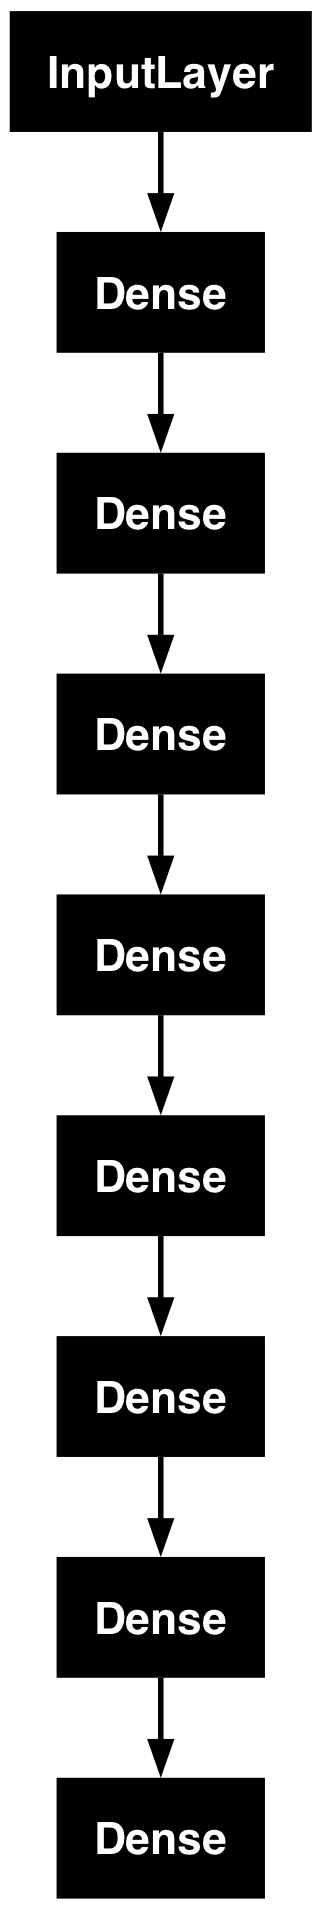

In [69]:
import tensorflow as tf
plot_path = 'autoencoder_model.png'
tf.keras.utils.plot_model(
    autoencoder,
    to_file=plot_path,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=False,
    show_trainable=False
)

from IPython.display import Image
Image(filename=plot_path)

In [70]:
import numpy as np
import pandas as pd
# Train the Autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=1)


Epoch 1/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 2s 439us/step - loss: 0.6533 - val_loss: 0.5573
Epoch 2/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - loss: 0.5646 - val_loss: 0.5510
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - loss: 0.5591 - val_loss: 0.5497
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - loss: 0.5599 - val_loss: 0.5497
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - loss: 0.5628 - val_loss: 0.5487
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - loss: 0.5558 - val_loss: 0.5486
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - loss: 0.5584 - val_loss: 0.5485
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - loss: 0.5582 - val_loss: 0.5480
Epoch 9/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - loss: 0.5555 - val_loss: 0.5479
Epoch 10/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step - loss: 0.5586 - val_loss: 0.5482
Epoch 11/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 0.5451 - val_loss: 0.5481
Epoch 12

In [71]:
# Reconstruct the Data and Calculate Reconstruction Error
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# Detect Anomalies Based on Reconstruction Error
threshold = np.percentile(reconstruction_errors, 99)  # Set threshold at 99 percentile
data['Autoencoder_Anomaly'] = (reconstruction_errors > threshold).astype(int)

# Identify anomalies
anomalies = reconstruction_errors > threshold
num_anomalies = np.sum(anomalies)

print(f'Number of anomalies: {num_anomalies}')


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 227us/step
Number of anomalies: 1000


### Model Training and Anomaly Detection Results

**Training Progress:**
- **Epochs Completed:** 3125

**Anomaly Detection:**
- **Number of Anomalies Detected:** 1000


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step
Number of anomalies: 1000


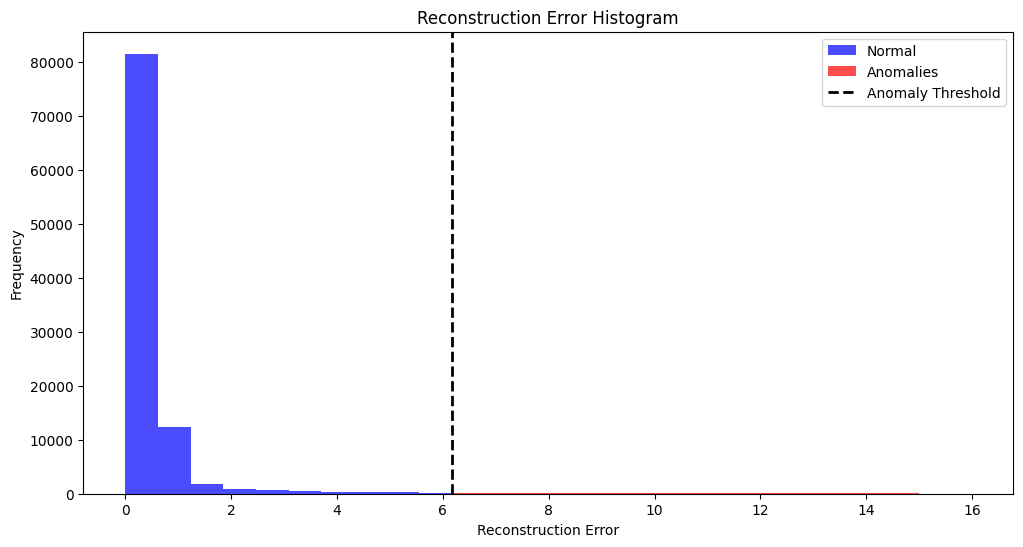

In [73]:
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# Detect Anomalies Based on Reconstruction Error
threshold = np.percentile(reconstruction_errors, 99)  # Set threshold at 99 percentile
data['Autoencoder_Anomaly'] = (reconstruction_errors > threshold).astype(int)

# Identify anomalies
anomalies = reconstruction_errors > threshold
num_anomalies = np.sum(anomalies)

print(f'Number of anomalies: {num_anomalies}')

# Plot the Reconstruction Error Histogram
plt.figure(figsize=(12, 6))
plt.hist(reconstruction_errors[~anomalies], bins=10, color='blue', alpha=0.7, label='Normal')
plt.hist(reconstruction_errors[anomalies], bins=10, color='red', alpha=0.7, label='Anomalies')
plt.axvline(threshold, color='black', linestyle='dashed', linewidth=2, label='Anomaly Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Histogram')
plt.legend()
plt.show()

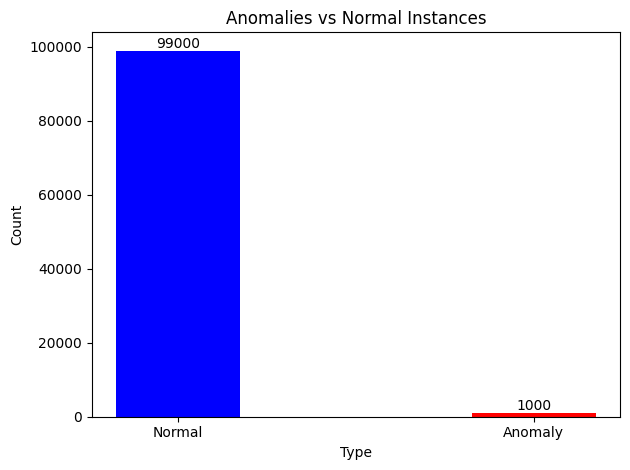

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

threshold = np.percentile(reconstruction_errors, 99)
anomalies = reconstruction_errors > threshold

# Bar Graph for anomalies vs. normal instances
normal_count = sum(~anomalies)
anomaly_count = sum(anomalies)
    
bar_width = 0.35
index = np.arange(2)
    
bars = plt.bar(index, [normal_count, anomaly_count], bar_width, color=['blue', 'red'])
plt.title('Anomalies vs Normal Instances')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(index, ['Normal', 'Anomaly'])

# counts on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


 **Number of Anomalies Detected:** 1000


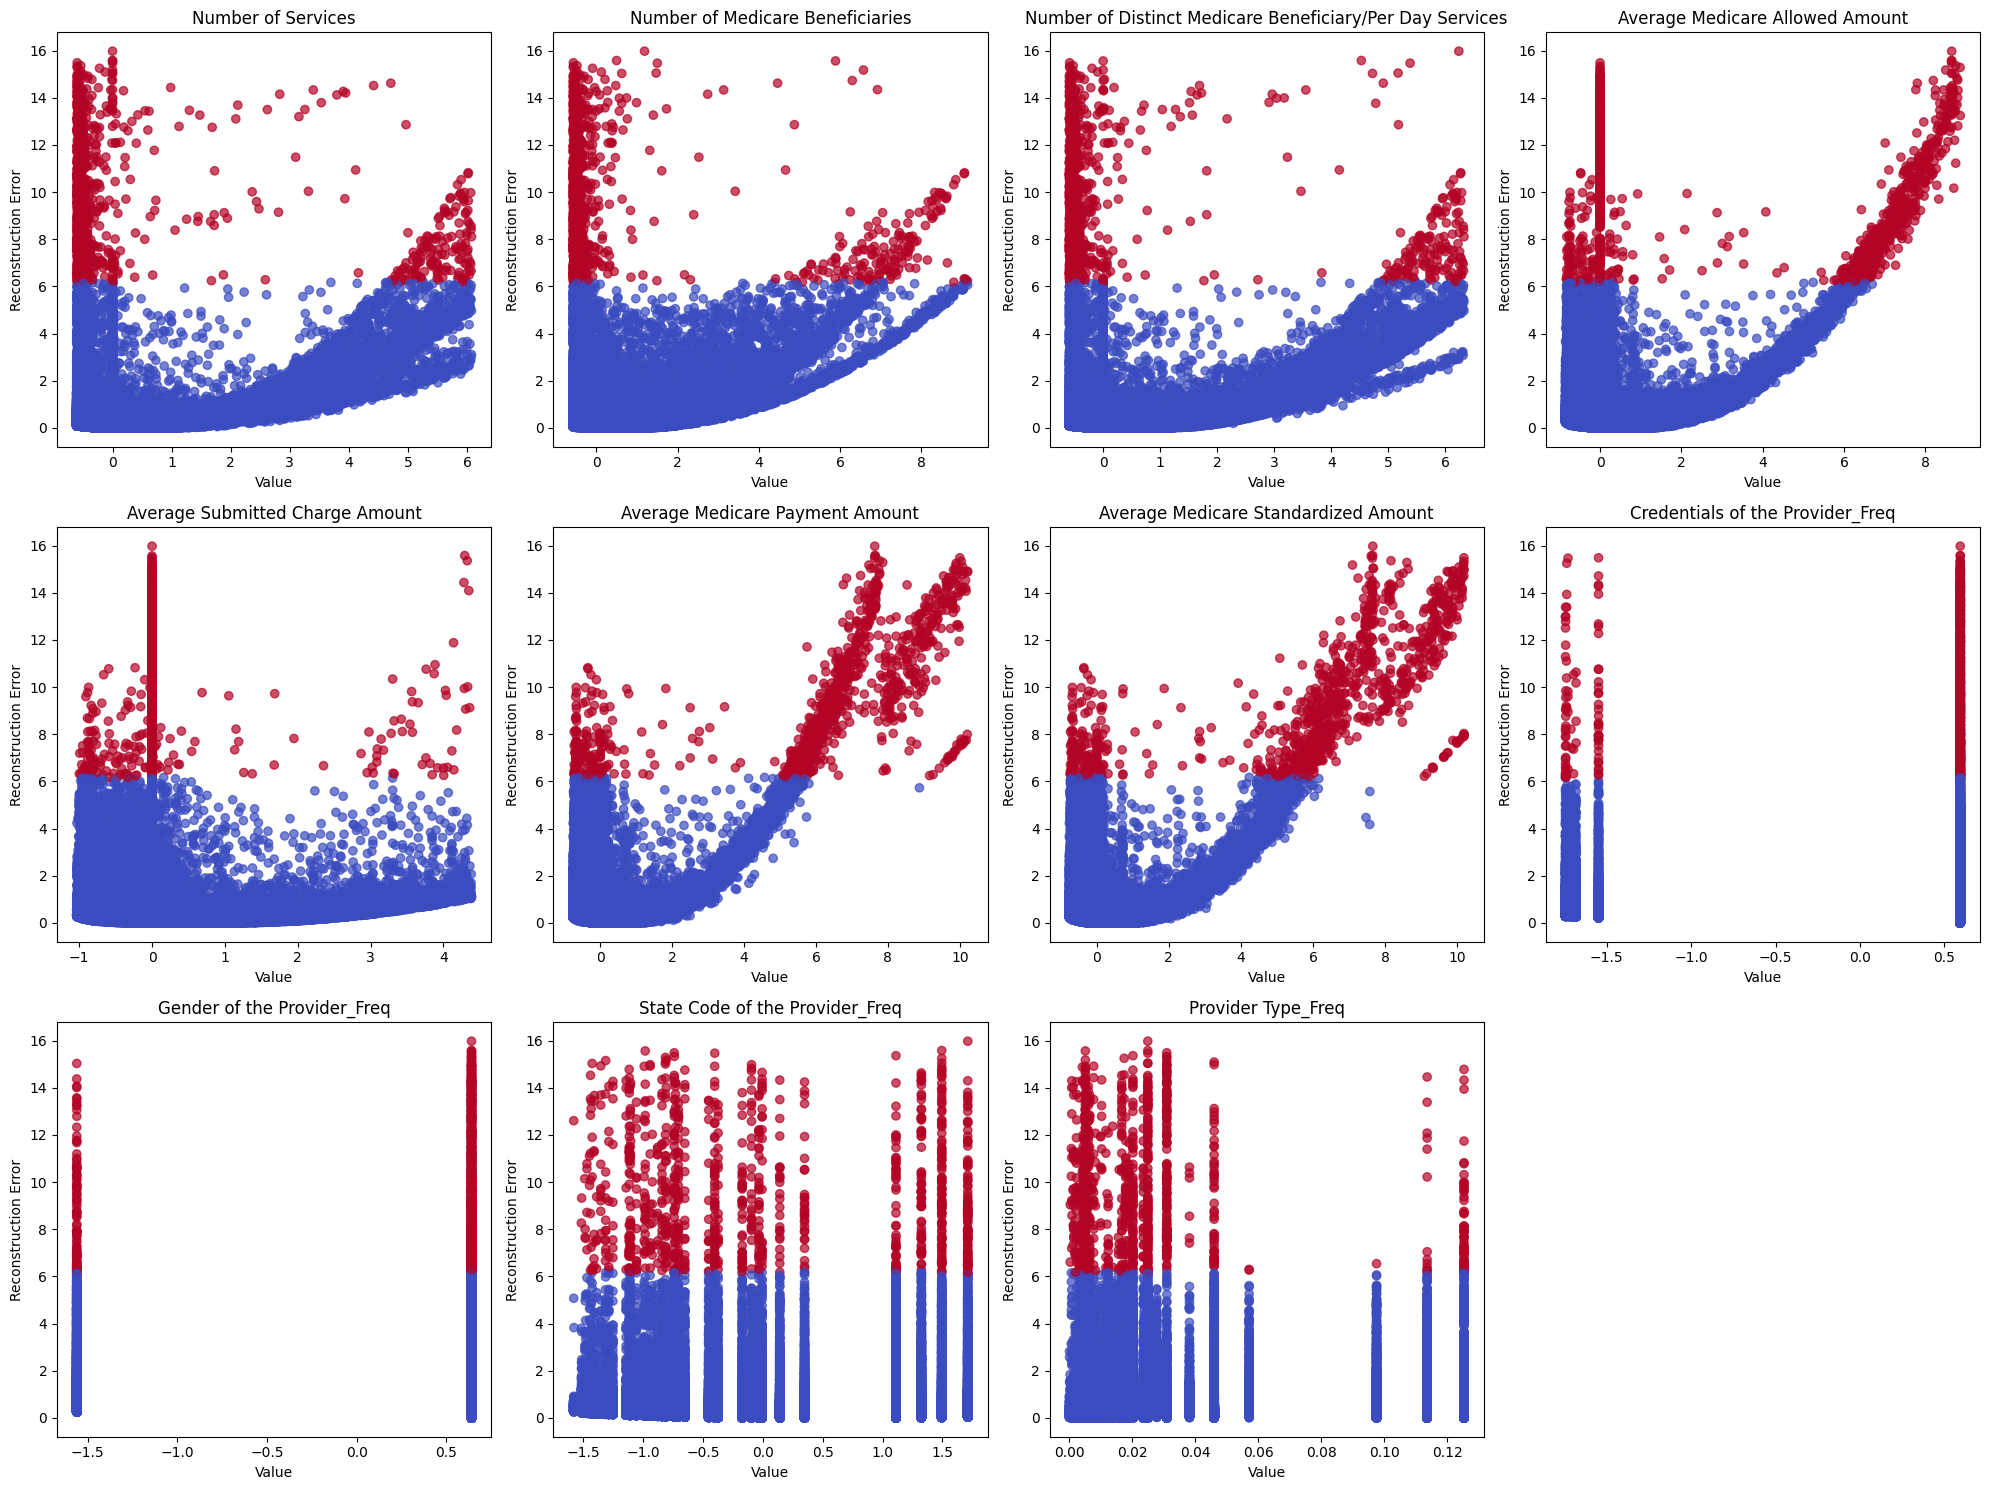

In [75]:
# Scatter Plots of anomalies in each column 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], reconstruction_errors, c=anomalies, cmap='coolwarm', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Reconstruction Error')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

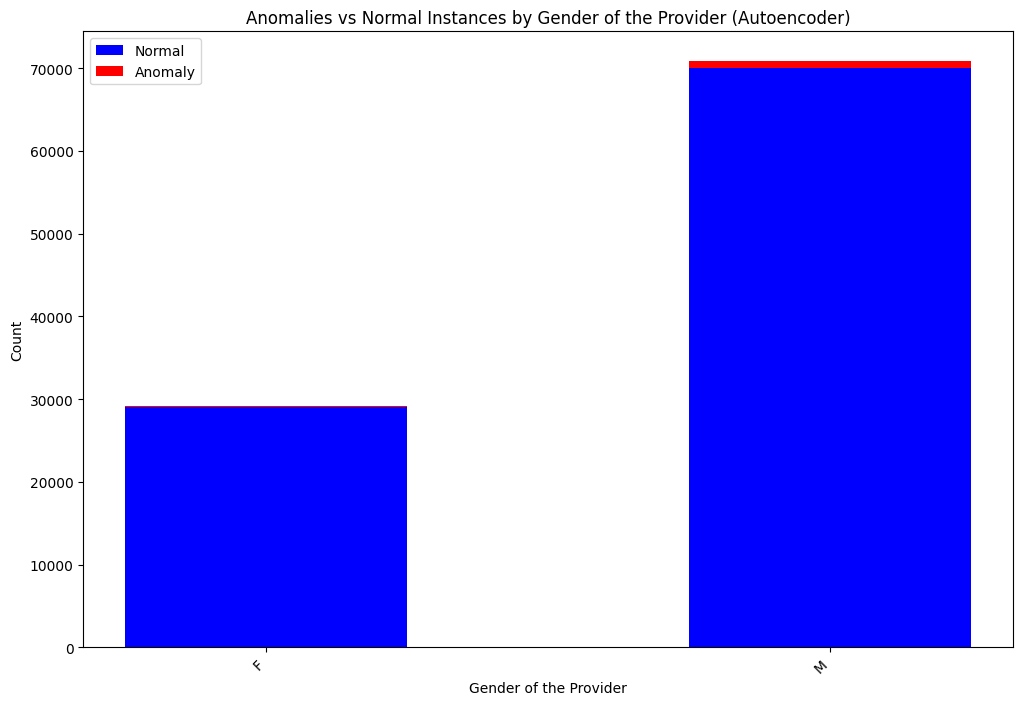

In [76]:
original_gender_column = df['Gender of the Provider'].unique()
freq_encoded_gender_column = df['Gender of the Provider_Freq'].unique()

gender_mapping_dict = {}
for original_value in original_gender_column:
    freq_encoded_value = df.loc[df['Gender of the Provider'] == original_value, 'Gender of the Provider_Freq'].values[0]
    gender_mapping_dict[freq_encoded_value] = original_value


#Stacked Bar Plot for 'Gender of the Provider'
gender_grouped_autoencoder = data.groupby(['Gender of the Provider_Freq', 'Autoencoder_Anomaly']).size().unstack().fillna(0)
gender_grouped_autoencoder.columns = ['Normal', 'Anomaly'] if gender_grouped_autoencoder.shape[1] == 2 else (['Normal'] if 0 in gender_grouped_autoencoder.columns else ['Anomaly'])
gender_grouped_autoencoder = gender_grouped_autoencoder.reset_index()

# Mapping the frequency-encoded values back to the original values for labels
gender_grouped_autoencoder['Gender of the Provider'] = gender_grouped_autoencoder['Gender of the Provider_Freq'].map(gender_mapping_dict)

# Plot stacked bar plot for 'Gender of the Provider'
plt.figure(figsize=(12, 8))
bar_width = 0.5
bars1 = plt.bar(gender_grouped_autoencoder['Gender of the Provider'], gender_grouped_autoencoder['Normal'], color='blue', label='Normal', width=bar_width)
bars2 = plt.bar(gender_grouped_autoencoder['Gender of the Provider'], gender_grouped_autoencoder['Anomaly'], bottom=gender_grouped_autoencoder['Normal'], color='red', label='Anomaly', width=bar_width)
plt.xlabel('Gender of the Provider')
plt.ylabel('Count')
plt.title('Anomalies vs Normal Instances by Gender of the Provider (Autoencoder)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


<H2>We can see that more anamolies are present among Males than Females </H2>

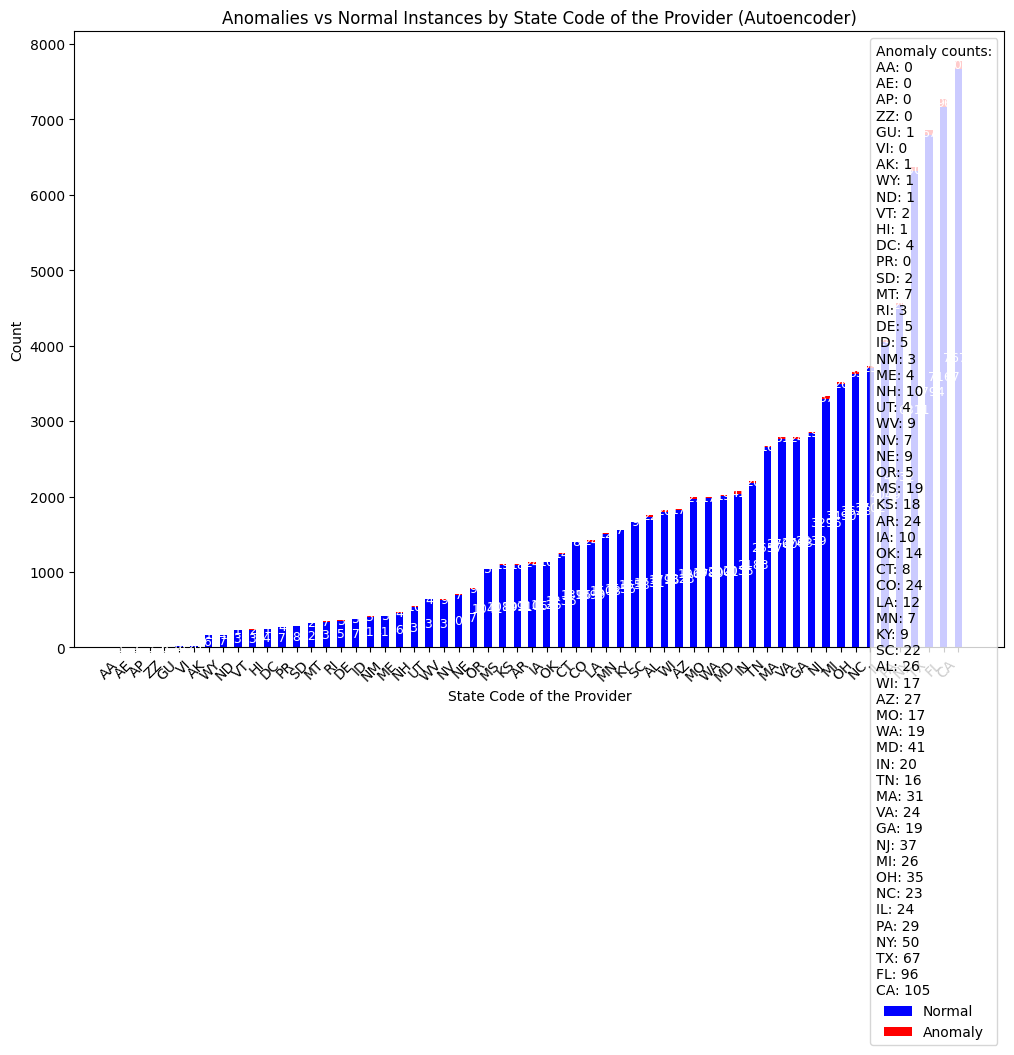

In [77]:
# Mapping frequency-encoded values back to original values for State Code of the Provider
original_state_code_column = df['State Code of the Provider'].unique()
freq_encoded_state_code_column = df['State Code of the Provider_Freq'].unique()

state_code_mapping_dict = {}
for original_value in original_state_code_column:
    freq_encoded_value = df.loc[df['State Code of the Provider'] == original_value, 'State Code of the Provider_Freq'].values[0]
    state_code_mapping_dict[freq_encoded_value] = original_value

# Plot Stacked Bar Plot for 'State Code of the Provider_Freq'
state_code_grouped_autoencoder = data.groupby(['State Code of the Provider_Freq', 'Autoencoder_Anomaly']).size().unstack().fillna(0)
state_code_grouped_autoencoder.columns = ['Normal', 'Anomaly'] if state_code_grouped_autoencoder.shape[1] == 2 else (['Normal'] if 0 in state_code_grouped_autoencoder.columns else ['Anomaly'])
state_code_grouped_autoencoder = state_code_grouped_autoencoder.reset_index()

# Map the frequency-encoded values back to the original values for labels
state_code_grouped_autoencoder['State Code of the Provider'] = state_code_grouped_autoencoder['State Code of the Provider_Freq'].map(state_code_mapping_dict)

# Calculate total counts for each state code
state_code_grouped_autoencoder['Total'] = state_code_grouped_autoencoder['Normal'] + state_code_grouped_autoencoder['Anomaly']

# Plot stacked bar plot for 'State Code of the Provider'
plt.figure(figsize=(12, 8))
bar_width = 0.5
bars1 = plt.bar(state_code_grouped_autoencoder['State Code of the Provider'], state_code_grouped_autoencoder['Normal'], color='blue', label='Normal', width=bar_width)
bars2 = plt.bar(state_code_grouped_autoencoder['State Code of the Provider'], state_code_grouped_autoencoder['Anomaly'], bottom=state_code_grouped_autoencoder['Normal'], color='red', label='Anomaly', width=bar_width)

# Annotate counts on the bars
for i in range(state_code_grouped_autoencoder.shape[0]):
    plt.text(i, state_code_grouped_autoencoder['Normal'][i] / 2, int(state_code_grouped_autoencoder['Normal'][i]), ha='center', va='center', color='white', fontsize=9)
    if state_code_grouped_autoencoder['Anomaly'][i] > 0:
        plt.text(i, state_code_grouped_autoencoder['Normal'][i] + state_code_grouped_autoencoder['Anomaly'][i] / 2, int(state_code_grouped_autoencoder['Anomaly'][i]), ha='center', va='center', color='white', fontsize=9)

plt.xlabel('State Code of the Provider')
plt.ylabel('Count')
plt.title('Anomalies vs Normal Instances by State Code of the Provider (Autoencoder)')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', title=f'Anomaly counts:\n' + '\n'.join([f"{row['State Code of the Provider']}: {int(row['Anomaly'])}" for _, row in state_code_grouped_autoencoder.iterrows()]))
plt.show()


<h2>We can see that most anomolies occur in the 
    state of California - 105, followed by Florida- 96 and Texas- 67</h2>

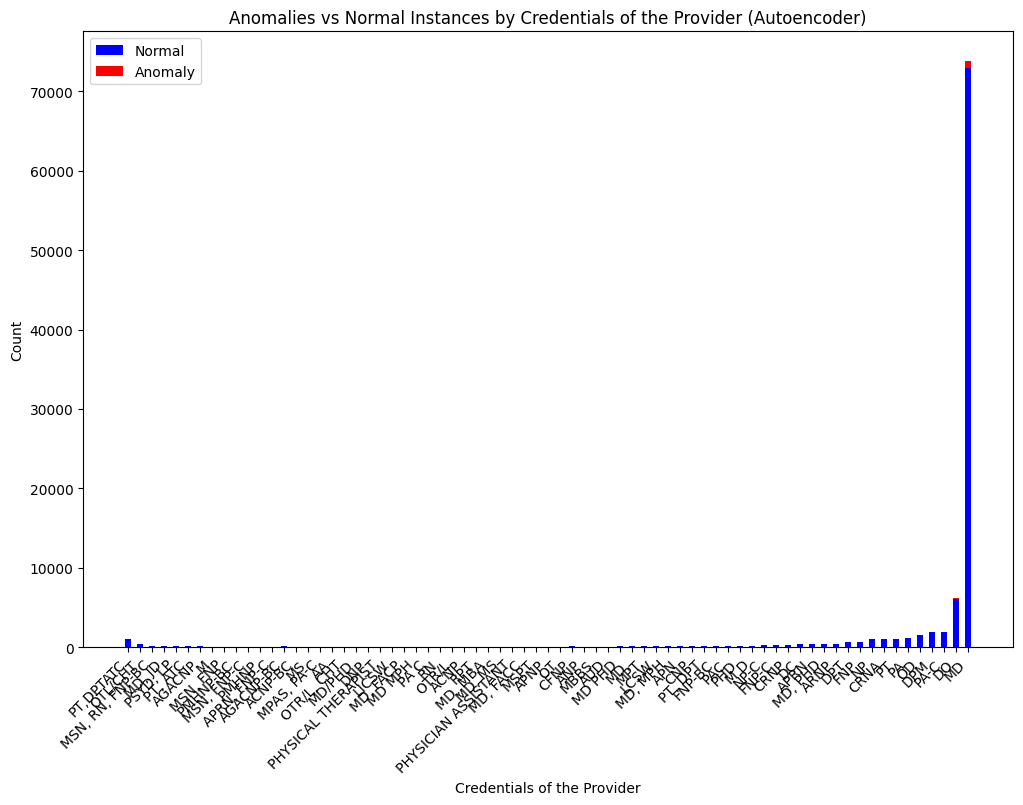

In [78]:
original_credentials_column = df['Credentials of the Provider'].unique()
freq_encoded_credentials_column = df['Credentials of the Provider_Freq'].unique()

credentials_mapping_dict = {}
for original_value in original_credentials_column:
    freq_encoded_value = df.loc[df['Credentials of the Provider'] == original_value, 'Credentials of the Provider_Freq'].values[0]
    credentials_mapping_dict[freq_encoded_value] = original_value

credentials_grouped_autoencoder = data.groupby(['Credentials of the Provider_Freq', 'Autoencoder_Anomaly']).size().unstack().fillna(0)
credentials_grouped_autoencoder.columns = ['Normal', 'Anomaly'] if credentials_grouped_autoencoder.shape[1] == 2 else (['Normal'] if 0 in credentials_grouped_autoencoder.columns else ['Anomaly'])
credentials_grouped_autoencoder = credentials_grouped_autoencoder.reset_index()

# Mapping the frequency-encoded values back to the original values for labels
credentials_grouped_autoencoder['Credentials of the Provider'] = credentials_grouped_autoencoder['Credentials of the Provider_Freq'].map(credentials_mapping_dict)

# stacked bar plot for 'Credentials of the Provider'
plt.figure(figsize=(12, 8))
bar_width = 0.5
bars1 = plt.bar(credentials_grouped_autoencoder['Credentials of the Provider'], credentials_grouped_autoencoder['Normal'], color='blue', label='Normal', width=bar_width)
bars2 = plt.bar(credentials_grouped_autoencoder['Credentials of the Provider'], credentials_grouped_autoencoder['Anomaly'], bottom=credentials_grouped_autoencoder['Normal'], color='red', label='Anomaly', width=bar_width)
plt.xlabel('Credentials of the Provider')
plt.ylabel('Count')
plt.title('Anomalies vs Normal Instances by Credentials of the Provider (Autoencoder)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


<H2>We can see that most anamolies are present for credential MD, followed by DO </H2>

In [79]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get the reconstructed data from the autoencoder
X_reconstructed = autoencoder.predict(X_scaled)

# Calculate the reconstruction errors
reconstruction_errors = np.mean(np.abs(X_scaled - X_reconstructed), axis=1)

# Calculate RMSE for the entire dataset
rmse = np.sqrt(mean_squared_error(X_scaled, X_reconstructed))

# Calculate MAE for the entire dataset
mae = mean_absolute_error(X_scaled, X_reconstructed)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 1s 228us/step
RMSE: 0.7449496709144504
MAE: 0.42714024866158784


### Interpretation of Results

**Root Mean Squared Error (RMSE):**
- **Value:** 0.744
- **Interpretation:** The RMSE measures the average magnitude of reconstruction errors. An RMSE of 0.744 suggests a moderate level of error, so for our medical dataset of healthcare providers with 100,000 entries, this indicates a moderate reconstruction accuracy.

**Mean Absolute Error (MAE):**
- **Value:** 0.426
- **Interpretation:** The MAE measures the average absolute difference between the original and reconstructed data. An MAE of 0.426 indicates a moderate average error. This suggests the model's performance is fairly reasonable but may need improvement for critical applications.


In [80]:
# Separate normal and anomaly data
normal_data = X_scaled[~anomalies]
anomaly_data = X_scaled[anomalies]

# Reconstruct the data
normal_data_reconstructed = autoencoder.predict(normal_data)
anomaly_data_reconstructed = autoencoder.predict(anomaly_data)

# Calculate MSE for normal and anomaly data
normal_mse = mean_squared_error(normal_data, normal_data_reconstructed)
anomaly_mse = mean_squared_error(anomaly_data, anomaly_data_reconstructed)

# Print the results
print(f"Normal Data MSE: {normal_mse}")
print(f"Anomaly Data MSE: {anomaly_mse}")


3094/3094 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step
Normal Data MSE: 0.4637553621620089
Anomaly Data MSE: 9.583220365515633


### Interpretation of Results

**Normal Data MSE:**
- **Value:** 0.464
- **Interpretation:** The MSE for normal data is 0.464. This indicates a low average reconstruction error for the data points that are not considered anomalies. The autoencoder performs well on the normal data, accurately reconstructing the input data with minimal error.

**Anomaly Data MSE:**
- **Value:** 9.585
- **Interpretation:** The MSE for anomaly data is 9.585. This significantly higher value compared to the normal data MSE suggests that the autoencoder struggles to reconstruct the anomalous data points accurately. The high reconstruction error confirms the presence of anomalies, highlighting that these data points differ substantially from the normal data.